In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

# Fonte: 
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-da-educacao-superior 

#### Funções utilizadas:

In [2]:
def create_piechart(n_homens,n_mulheres,titulo):
    cars = ['Homens', 'Mulheres'] 
    data = [n_homens,n_mulheres] 
    colors = ( "orange", "blue") 
    wp = { 'linewidth' : 0.6, 'edgecolor' : "black" } 
    
    def func(pct, allvalues): 
        absolute = int(pct / 100.*np.sum(allvalues)) 
        return "{:.1f}%\n({:d} )".format(pct, absolute) 
    
    fig, ax = plt.subplots(figsize =(8, 8)) 
    wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  labels = cars, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp) 
    ax.legend(wedges, cars, 
          title ="", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
    
    plt.setp(autotexts, size = 16, weight ="bold") 
    ax.set_title(titulo) 
    plt.show() 

In [3]:
def replace_and_separate_dfs(dframe):
    
    dframe['TP_SEXO'] = dframe['TP_SEXO'].replace([2],'Homens')
    dframe['TP_SEXO'] = dframe['TP_SEXO'].replace([1],'Mulheres')
    
 
    df_mulheres = dframe[dframe['TP_SEXO'] == 'Mulheres']
    df_homens = dframe[dframe['TP_SEXO'] == 'Homens']

    n_mulheres = len(df_mulheres)
    n_homens = len(df_homens)
    
    return n_homens,n_mulheres

### Tabela com informações dos cursos: SUP_CURSO_2019.CSV

In [4]:
df_bycourse = pd.read_csv('SUP_CURSO_2019.CSV',sep = "|",usecols= ['CO_CURSO','NO_CURSO'])

In [5]:
df_bycourse.head(3)

,CO_CURSO,NO_CURSO
0,1,DIREITO
1,2,CI�NCIAS ECON�MICAS
2,3,ENGENHARIA CIVIL


# Tabela com informações dos alunos

### Colunas utilizadas: TP_SEXO (Homem/Mulher) , CO_CURSO (Codigo do curso) , NU_ANO_INGRESSO (Ano de ingresso), IN_INGRESSO_TOTAL (Se o aluno é ingressante ou não)

* IN_INGRESSO_TOTAL : Informa se o aluno é ingressante no curso, não importando a forma de ingresso utilizada. 
 * (0. Situação diferente de ingresso total 1. Situação de ingresso total) 
* NU_ANO_INGRESSO : Ano de ingresso do aluno no curso 


In [6]:
df_alunos = pd.read_csv('SUP_ALUNO_2019.CSV',sep = "|", usecols= ['TP_SEXO','CO_CURSO','NU_ANO_INGRESSO','IN_INGRESSO_TOTAL'])

In [7]:
df_alunos.head(4)

,CO_CURSO,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO
0,1,1,0,2017
1,1,2,0,2016
2,1,2,0,2012
3,1,1,0,2015


### Realizando merge entre as tabelas dos alunos e dos cursos para realizar a correspondência codigo do curso - nome do curso (a tabela dos alunos não continha os nomes dos cursos, tinha somente os codigos)

In [8]:
result = pd.merge(df_alunos,df_bycourse,on='CO_CURSO')

In [9]:
result.head(5)

,CO_CURSO,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
0,1,1,0,2017,DIREITO
1,1,2,0,2016,DIREITO
2,1,2,0,2012,DIREITO
3,1,1,0,2015,DIREITO
4,1,2,0,2013,DIREITO


In [10]:
result = result.drop(['CO_CURSO'], axis=1)

In [11]:
result.head()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
0,1,0,2017,DIREITO
1,2,0,2016,DIREITO
2,2,0,2012,DIREITO
3,1,0,2015,DIREITO
4,2,0,2013,DIREITO


## Selecionando alunos ingressantes (ingresso total) em 2019

In [12]:
result = result[(result['NU_ANO_INGRESSO'] == 2019) & (result['IN_INGRESSO_TOTAL'] == 1)]

In [13]:
result.tail()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
12350827,2,1,2019,AN�LISE DE PROCESSOS AGROINDUSTRIAIS
12350828,2,1,2019,AN�LISE DE PROCESSOS AGROINDUSTRIAIS
12350829,2,1,2019,AN�LISE DE PROCESSOS AGROINDUSTRIAIS
12350830,1,1,2019,AN�LISE DE PROCESSOS AGROINDUSTRIAIS
12350831,2,1,2019,AN�LISE DE PROCESSOS AGROINDUSTRIAIS


# Cursos relacionados a computação
--- Majoritariamente: engenharia e ciências da computação

In [14]:
computacao_df = result[result.NO_CURSO.str.contains('COMPUTA��O',case=False)]

In [15]:
computacao_df.head()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
9045,2,1,2019,CI�NCIA DA COMPUTA��O
9066,1,1,2019,CI�NCIA DA COMPUTA��O
9069,2,1,2019,CI�NCIA DA COMPUTA��O
9091,2,1,2019,CI�NCIA DA COMPUTA��O
9099,2,1,2019,CI�NCIA DA COMPUTA��O


### Substituindo numeros por mulheres/homens

In [16]:
n_homens_comp,n_mulheres_comp = replace_and_separate_dfs(computacao_df)

C:\Users\livia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\livia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
computacao_df.head()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
9045,Homens,1,2019,CI�NCIA DA COMPUTA��O
9066,Mulheres,1,2019,CI�NCIA DA COMPUTA��O
9069,Homens,1,2019,CI�NCIA DA COMPUTA��O
9091,Homens,1,2019,CI�NCIA DA COMPUTA��O
9099,Homens,1,2019,CI�NCIA DA COMPUTA��O


In [18]:
computacao_df.tail()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
12310884,Homens,1,2019,ENGENHARIA DE COMPUTA��O
12310885,Homens,1,2019,ENGENHARIA DE COMPUTA��O
12310886,Homens,1,2019,ENGENHARIA DE COMPUTA��O
12316493,Homens,1,2019,ENGENHARIA DE COMPUTA��O
12316494,Homens,1,2019,ENGENHARIA DE COMPUTA��O


# Comparação numero mulheres/homens nos cursos relacionados a computação (engenharia e ciência da computação, majoriatariamente)

#### Separando o dataframe em dois: homens e mulheres

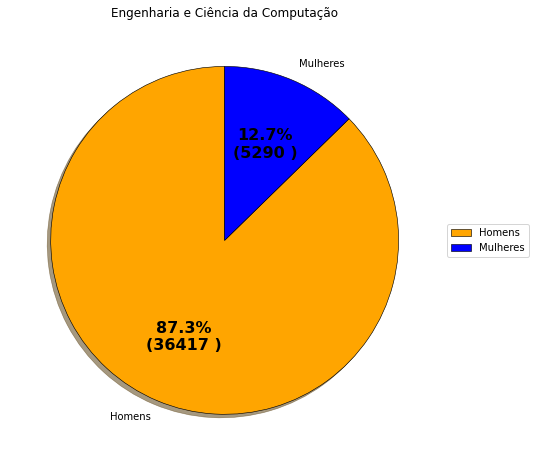

In [19]:
create_piechart(n_homens_comp,n_mulheres_comp,"Engenharia e Ciência da Computação")

# Analisando cursos de ciências exatas: 

### Definindo cursos de EXATAS

In [20]:
lista_exatas = ['ASTRONOMIA','ESTAT�STICA','CI�NCIA DA COMPUTA��O','ENGENHARIA DA COMPUTA��O','F�SICA','NANOTECNOLOGIA','QU�MICA','MATEM�TICA','SISTEMAS DE INFORMA��O','COMPUTA��O','INFORM�TICA','GEOLOGIA','ENGENHARIA DE COMPUTA��O']

In [21]:
# Condições: curso esta contido na lista_exatas, ou contém o nome EXATAS 
exatas_df = result[result['NO_CURSO'].isin(lista_exatas) | result.NO_CURSO.str.contains('EXATAS',case=False)]

In [22]:
exatas_df.head()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
4906,2,1,2019,GEOLOGIA
4920,1,1,2019,GEOLOGIA
4922,2,1,2019,GEOLOGIA
4941,1,1,2019,GEOLOGIA
4964,2,1,2019,GEOLOGIA


In [23]:
len(exatas_df)

137576

In [24]:
n_homens_exatas,n_mulheres_exatas = replace_and_separate_dfs(exatas_df)

C:\Users\livia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\livia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
exatas_df.head()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
4906,Homens,1,2019,GEOLOGIA
4920,Mulheres,1,2019,GEOLOGIA
4922,Homens,1,2019,GEOLOGIA
4941,Mulheres,1,2019,GEOLOGIA
4964,Homens,1,2019,GEOLOGIA


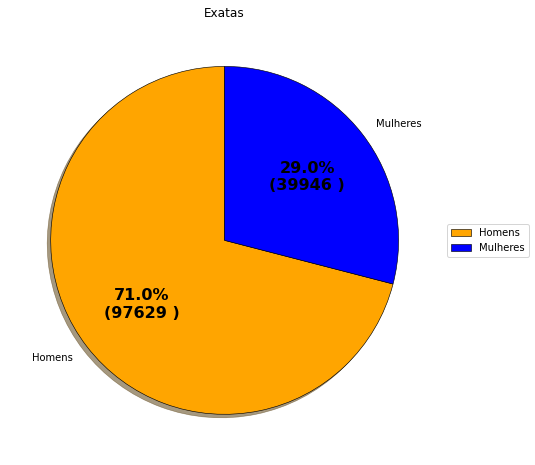

In [26]:
create_piechart(n_homens_exatas,n_mulheres_exatas,"Exatas")

# Analisando cursos de engenharia:

In [27]:
engenharias_df = result[result.NO_CURSO.str.contains('ENGENHARIA',case=False)]

In [28]:
engenharias_df.head()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
1093,2,1,2019,ENGENHARIA CIVIL
1115,2,1,2019,ENGENHARIA CIVIL
1134,2,1,2019,ENGENHARIA CIVIL
1168,2,1,2019,ENGENHARIA CIVIL
1290,2,1,2019,ENGENHARIA CIVIL


In [29]:
n_homens_engenharias,n_mulheres_engenharias = replace_and_separate_dfs(engenharias_df)

C:\Users\livia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\livia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
engenharias_df.head()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
1093,Homens,1,2019,ENGENHARIA CIVIL
1115,Homens,1,2019,ENGENHARIA CIVIL
1134,Homens,1,2019,ENGENHARIA CIVIL
1168,Homens,1,2019,ENGENHARIA CIVIL
1290,Homens,1,2019,ENGENHARIA CIVIL


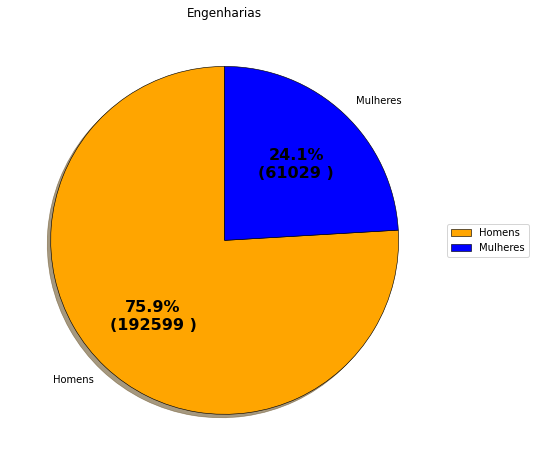

In [31]:
create_piechart(n_homens_engenharias,n_mulheres_engenharias,"Engenharias")

# Comparando as três areas : 

In [32]:
import seaborn as sns

In [33]:
computacao_df.loc[(computacao_df.NO_CURSO.str.contains('COMPUTA��O',case=False)),'NO_CURSO']='Computacao'

C:\Users\livia\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [34]:
computacao_df.head()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
9045,Homens,1,2019,Computacao
9066,Mulheres,1,2019,Computacao
9069,Homens,1,2019,Computacao
9091,Homens,1,2019,Computacao
9099,Homens,1,2019,Computacao


In [35]:
engenharias_df.loc[(engenharias_df.NO_CURSO.str.contains('ENGENHARIA',case=False)),'NO_CURSO']='Engenharias'

C:\Users\livia\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [36]:
engenharias_df.head()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
1093,Homens,1,2019,Engenharias
1115,Homens,1,2019,Engenharias
1134,Homens,1,2019,Engenharias
1168,Homens,1,2019,Engenharias
1290,Homens,1,2019,Engenharias


In [37]:
exatas_df.loc[(exatas_df['NO_CURSO'].isin(lista_exatas) | exatas_df.NO_CURSO.str.contains('EXATAS',case=False)),'NO_CURSO']='Exatas'

C:\Users\livia\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [38]:
exatas_df.head()

,TP_SEXO,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,NO_CURSO
4906,Homens,1,2019,Exatas
4920,Mulheres,1,2019,Exatas
4922,Homens,1,2019,Exatas
4941,Mulheres,1,2019,Exatas
4964,Homens,1,2019,Exatas


In [39]:
frames = [computacao_df, engenharias_df, exatas_df]

In [40]:
df1 = pd.concat(frames)

In [41]:
df_1 = df1.rename(columns={'TP_SEXO': '','NO_CURSO':'Curso'})

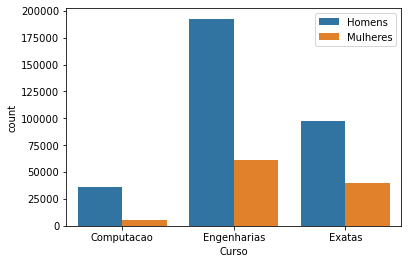

In [42]:
ax = sns.countplot(x="Curso", hue="", data=df_1)

## Analisando a parcela de alunos concluintes: IN_CONCLUINTES = 1
* "O MEC entende como concluintes aqueles alunos que já cursaram 80% ou mais da carga horária do curso, no caso das licenciaturas e bacharelados, e 75% ou mais no caso dos cursos superiores de tecnologia."

In [43]:
df_alunos = pd.read_csv('SUP_ALUNO_2019.CSV',sep = "|", usecols= ['TP_SEXO','CO_CURSO','IN_INGRESSO_TOTAL','IN_CONCLUINTE'])

In [44]:
df_ingressantes_concluintes = df_alunos[df_alunos['IN_CONCLUINTE'] == 1]

In [45]:
df_ingressantes_concluintes.tail()

,CO_CURSO,TP_SEXO,IN_CONCLUINTE,IN_INGRESSO_TOTAL
12350745,1487256,2,1,0
12350746,1487256,1,1,0
12350747,1487256,1,1,0
12350748,1487256,2,1,0
12350749,1487256,2,1,0


In [252]:
len(df_ingressantes_concluintes)

1250239

In [242]:
result = pd.merge(df_ingressantes_concluintes,df_bycourse,on='CO_CURSO')

In [243]:
result.head()

,CO_CURSO,TP_SEXO,IN_CONCLUINTE,IN_INGRESSO_TOTAL,NO_CURSO
0,1,2,1,1,DIREITO
1,6,1,1,1,PEDAGOGIA
2,6,1,1,1,PEDAGOGIA
3,29,1,1,1,CI�NCIAS BIOL�GICAS
4,101184,1,1,1,F�SICA


In [244]:
result = result.drop(['CO_CURSO'], axis=1)

In [245]:
computacao_df = result[result.NO_CURSO.str.contains('COMPUTA��O',case=False)]

In [246]:
n_homens_comp,n_mulheres_comp = replace_and_separate_dfs(computacao_df)

C:\Users\livia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\livia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [247]:
computacao_df.head()

,TP_SEXO,IN_CONCLUINTE,IN_INGRESSO_TOTAL,NO_CURSO
575,Homens,1,1,CI�NCIA DA COMPUTA��O
617,Homens,1,1,ENGENHARIA DE COMPUTA��O
618,Mulheres,1,1,ENGENHARIA DE COMPUTA��O
619,Homens,1,1,CI�NCIA DA COMPUTA��O
620,Homens,1,1,CI�NCIA DA COMPUTA��O


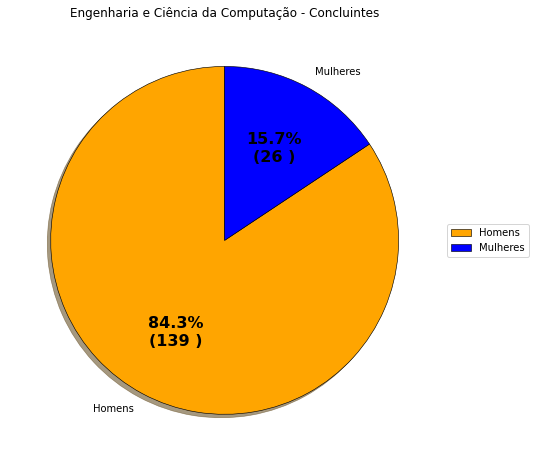

In [248]:
create_piechart(n_homens_comp,n_mulheres_comp,"Engenharia e Ciência da Computação - Concluintes")

In [233]:
exatas_df = result[result['NO_CURSO'].isin(lista_exatas) | result.NO_CURSO.str.contains('EXATAS',case=False)]

In [234]:
n_homens_exatas,n_mulheres_exatas = replace_and_separate_dfs(exatas_df)

C:\Users\livia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\livia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


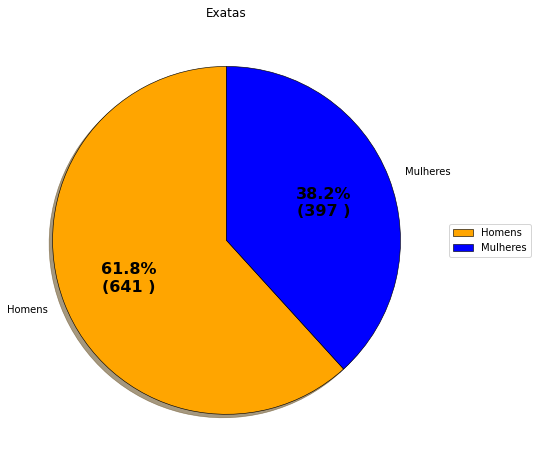

In [235]:
create_piechart(n_homens_exatas,n_mulheres_exatas,"Exatas")

In [238]:
len(exatas_df)

1038